In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [44]:
df = pd.read_csv('F:\\Build my Porto\\Projek 3 Python\\data_sales.csv')

In [45]:
df

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,6/17/2021,Southeast,Florida,Orlando,Women's Apparel,$103.00,218,"2,245","$1,257",Online
1,West Gear,1128299,7/16/2021,South,Louisiana,New Orleans,Women's Apparel,$103.00,163,"1,679",$806,Online
2,Sports Direct,1197831,8/25/2021,South,Alabama,Birmingham,Men's Street Footwear,$10.00,700,"7,000","$3,150",Outlet
3,Sports Direct,1197831,8/27/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,575,"8,625","$3,881",Outlet
4,Sports Direct,1197831,8/21/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,475,"7,125","$3,206",Outlet
...,...,...,...,...,...,...,...,...,...,...,...,...
9636,Amazon,1185732,11/18/2021,Northeast,Maine,Portland,Men's Apparel,$65.00,150,"9,750","$2,438",Outlet
9637,Amazon,1185732,10/22/2021,West,Alaska,Anchorage,Women's Athletic Footwear,$65.00,150,"9,750","$2,438",Outlet
9638,Amazon,1185732,10/22/2021,West,Alaska,Anchorage,Men's Apparel,$75.00,150,"11,250","$2,813",Outlet
9639,West Gear,1185732,4/10/2021,Midwest,Indiana,Indianapolis,Men's Apparel,$65.00,150,"9,750","$2,925",In-store


In [ ]:
# DATA CLEANING

In [47]:
# Data Understanding 
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method
0,Walmart,1128299,6/17/2021,Southeast,Florida,Orlando,Women's Apparel,$103.00,218,"2,245","$1,257",Online
1,West Gear,1128299,7/16/2021,South,Louisiana,New Orleans,Women's Apparel,$103.00,163,"1,679",$806,Online
2,Sports Direct,1197831,8/25/2021,South,Alabama,Birmingham,Men's Street Footwear,$10.00,700,"7,000","$3,150",Outlet
3,Sports Direct,1197831,8/27/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,575,"8,625","$3,881",Outlet
4,Sports Direct,1197831,8/21/2021,South,Alabama,Birmingham,Women's Street Footwear,$15.00,475,"7,125","$3,206",Outlet


In [ ]:
# Menghapus beberapa kolom yang tidak dibutuhkan dalam analisis
df.drop(columns = ['Retailer ID', 'Region', 'City'], inplace = True)

In [49]:
df.dtypes

Retailer            object
Invoice Date        object
State               object
Product             object
Price per Unit      object
Units Sold          object
Total Sales         object
Operating Profit    object
Sales Method        object
dtype: object

In [50]:
# Count null in each columns
print(df.isna().sum()) # Terdapat 2 nan di kolom price per unit

Retailer            0
Invoice Date        0
State               0
Product             0
Price per Unit      2
Units Sold          0
Total Sales         0
Operating Profit    0
Sales Method        0
dtype: int64


In [ ]:
# Menghapus missing value di kolom Price per unit
df.dropna(subset="Price per Unit", inplace=True)

In [52]:
df['Invoice Date'].unique()

array(['6/17/2021', '7/16/2021', '8/25/2021', '8/27/2021', '8/21/2021',
       '1/11/2021', '11/17/2021', '1/23/2021', '4/3/2021', '3/10/2020',
       '1/18/2021', '2/11/2021', '6/11/2021', '4/10/2021', '3/16/2021',
       '9/16/2021', '2/21/2021', '10/21/2021', '5/3/2020', '4/19/2020',
       '4/27/2020', '3/10/2021', '10/11/2021', '11/11/2021', '3/4/2020',
       '1/25/2020', '1/7/2020', '1/1/2020', '2/7/2021', '8/22/2021',
       '2/18/2021', '8/11/2021', '4/17/2021', '11/20/2021', '3/16/2020',
       '8/26/2020', '9/1/2020', '1/31/2020', '2/6/2020', '3/17/2020',
       '4/18/2020', '3/15/2020', '3/17/2021', '6/18/2021', '10/18/2021',
       '11/18/2021', '5/12/2021', '9/12/2021', '3/19/2021', '9/19/2021',
       '1/16/2021', '2/17/2021', '1/3/2020', '1/24/2020', '4/20/2020',
       '4/24/2020', '8/23/2020', '1/9/2021', '3/9/2020', '1/6/2021',
       '3/5/2020', '7/18/2020', '1/12/2021', '2/5/2020', '5/5/2020',
       '10/26/2020', '10/27/2020', '2/12/2021', '9/24/2021', '1/6/2020',

In [54]:
df['Year'] = pd.to_datetime(df['Invoice Date']).dt.year

In [ ]:
df['Order Month'] = df['Invoice Date'].apply(
    lambda x: datetime.datetime.strptime(x, "%m/%d/%Y").strftime('%Y-%m')) # Ekstrak data untuk menghasilkan kolom Order Month

In [56]:
df['Product'].unique() # Terdapat data Men's Apparel & Men's aparel 

array(["Women's Apparel", "Men's Street Footwear",
       "Women's Street Footwear", "Men's Athletic Footwear",
       "Women's Athletic Footwear", "Men's Apparel", "Men's aparel"],
      dtype=object)

In [ ]:
# Mengatasi data duplikat (replace <Men's aparel> dengan <Men's Apparel>)
df['Product'] = df['Product'].replace("Men's aparel", "Men's Apparel")

In [ ]:
# Hapus Dollar Sign di kolom Price per Unit & Operating Profit
def removeDollarSign(price):
    return price.replace('$', '')
df['Price per Unit'] = df['Price per Unit'].apply(removeDollarSign)
df['Operating Profit'] = df['Operating Profit'].apply(removeDollarSign)

In [ ]:
# convert kolom price per unit ke type data numerik
df['Price per Unit'] = pd.to_numeric(df['Price per Unit'], errors = 'coerce')

In [ ]:
# Mengganti tanda koma dalam kolom units sold, Total Sales, & Operating Profit dengan empty string
def replace_comma(Unit):
    return Unit.replace(',','')

df['Units Sold'] = df['Units Sold'].apply(replace_comma)
df['Total Sales'] = df['Total Sales'].apply(replace_comma)
df['Operating Profit'] = df['Operating Profit'].apply(replace_comma)

In [ ]:
# convert kolom units sold ke type data integer
df['Units Sold'] = df['Units Sold'].astype('int')

In [62]:
df[df['Units Sold']==0]

,Retailer,Invoice Date,State,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Sales Method,Year,Order Month
6529,Foot Locker,6/5/2021,Nebraska,Women's Athletic Footwear,35.0,0,0,0,Outlet,2021,2021-06
6530,Foot Locker,6/11/2021,Nebraska,Women's Athletic Footwear,30.0,0,0,0,Outlet,2021,2021-06
6531,Foot Locker,6/5/2021,Nebraska,Women's Athletic Footwear,33.0,0,0,0,Online,2021,2021-06
6532,Foot Locker,6/11/2021,Nebraska,Women's Athletic Footwear,27.0,0,0,0,Online,2021,2021-06


In [63]:
# Drop row where price per unit = 0
df = df[df['Units Sold'] != 0]

In [ ]:
# convert kolom Total Sales & Operating Profit ke type data numerik
df['Total Sales'] = pd.to_numeric(df['Total Sales'], errors = 'coerce')
df['Operating Profit'] = pd.to_numeric(df['Operating Profit'], errors = 'coerce')

C:\Users\ASMA\AppData\Local\Temp\ipykernel_14488\3352568928.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Sales'] = pd.to_numeric(df['Total Sales'], errors = 'coerce')
C:\Users\ASMA\AppData\Local\Temp\ipykernel_14488\3352568928.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Operating Profit'] = pd.to_numeric(df['Operating Profit'], errors = 'coerce')


In [65]:
df.dtypes

Retailer             object
Invoice Date         object
State                object
Product              object
Price per Unit      float64
Units Sold            int64
Total Sales           int64
Operating Profit      int64
Sales Method         object
Year                  int32
Order Month          object
dtype: object

In [66]:
#  Invoice Date
df.drop(columns = ['Invoice Date'], inplace = True)

C:\Users\ASMA\AppData\Local\Temp\ipykernel_14488\1198232099.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['Invoice Date'], inplace = True)


In [67]:
df.reset_index(drop=True, inplace=True)

In [ ]:
# EXPLORATORY DATA ANALYSIS

In [68]:
df.describe()

,Price per Unit,Units Sold,Total Sales,Operating Profit,Year
count,9635.000000,9635.000000,9635.000000,9635.000000,9635.000000
mean,45.217955,256.799273,9314.900571,3439.209549,2020.865387
std,14.705179,214.020187,14179.287701,5417.362413,0.341328
min,7.000000,6.000000,16.000000,8.000000,2020.000000
25%,35.000000,106.000000,426.000000,192.000000,2021.000000
50%,45.000000,176.000000,957.000000,437.000000,2021.000000
75%,55.000000,350.000000,15000.000000,5200.000000,2021.000000
max,110.000000,1275.000000,82500.000000,39000.000000,2021.000000


In [ ]:
# Monthly Revenue (2020 - 2021)
Monthly_Revenue = (
    df.groupby('Order Month')['Total Sales']
    .sum()
    .reset_index()
)
Monthly_Revenue

,Order Month,Total Sales
0,2020-01,1574381
1,2020-02,1499801
2,2020-03,1766062
3,2020-04,2460705
4,2020-05,1691806
5,2020-06,882984
6,2020-07,1670979
7,2020-08,1952802
8,2020-09,1830446
9,2020-10,1083626


In [70]:
# Total Revenue per Tahun
Annual_Revenue = (
    df.groupby('Year')['Total Sales']
    .sum()
    .reset_index()
)
Annual_Revenue

,Year,Total Sales
0,2020,18022475
1,2021,71726592


In [71]:
plt.style.use('seaborn-v0_8-whitegrid')


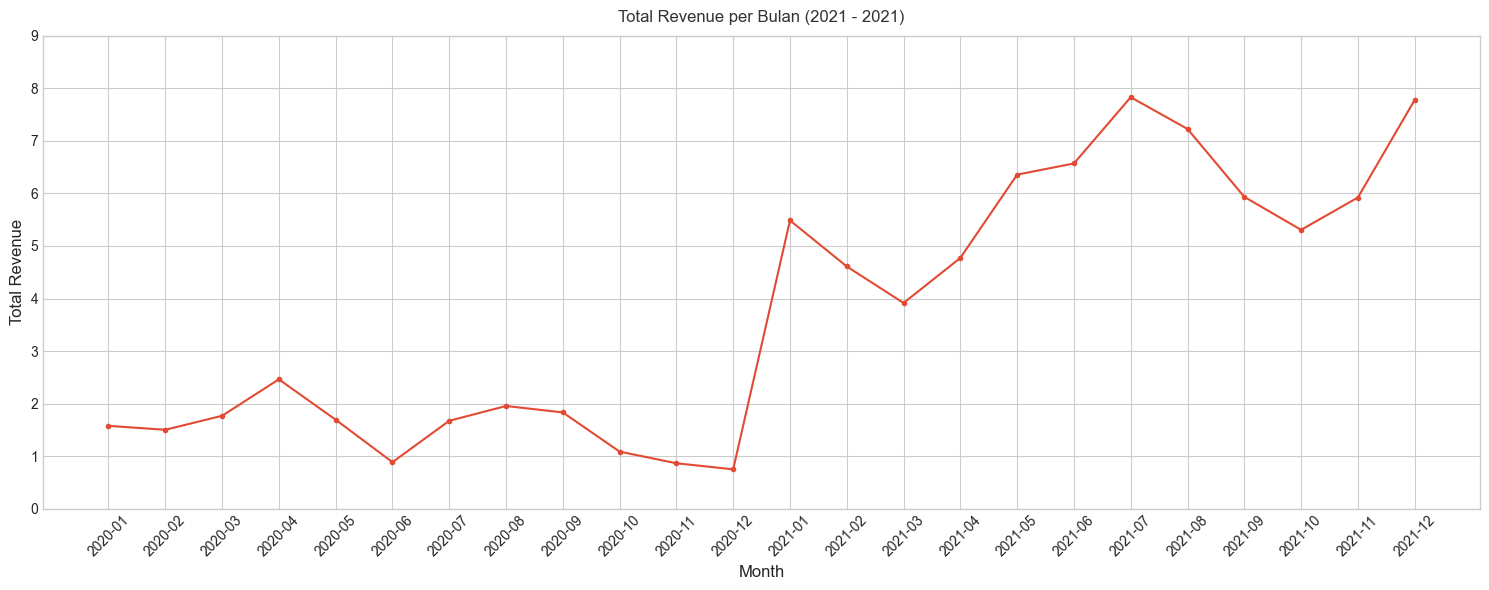

In [ ]:
# Visualisasi tren penjualan produk Adidas per bulan selama tahun 2020–2021
Monthly_Revenue .plot(
    x='Order Month', 
    y=['Total Sales'], 
    marker='.', 
    figsize=(15,6),
    legend = False
)

plt.title('Total Revenue per Bulan (2021 - 2021)', loc='center', pad=10,
          fontsize=12, color='#333333')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue', fontsize=12)
plt.ylim(ymin=0, ymax=8200000)

labels, locations = plt.yticks()
plt.yticks(labels, (labels / 1000000).astype(int))

plt.xticks(
    ticks=range(len(Monthly_Revenue )),
    labels=Monthly_Revenue['Order Month'],
    rotation=45
)

plt.tight_layout()
plt.show()


In [77]:
df_2021 = df[df['Year'] == 2021].copy()

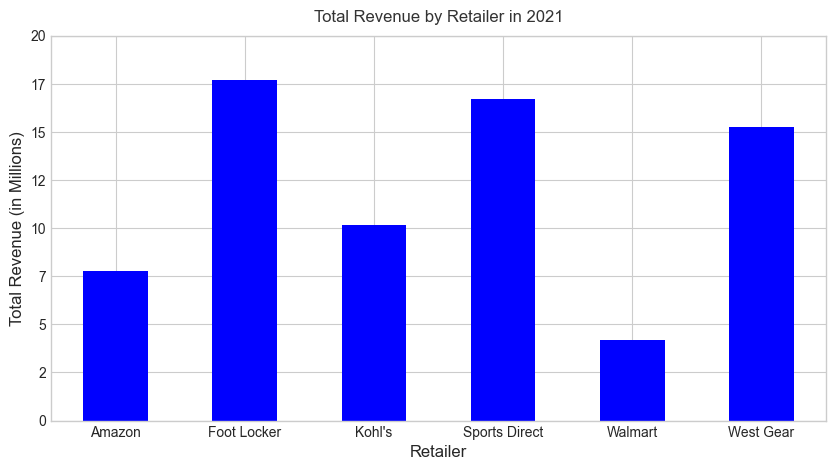

In [ ]:
# Total Revenue per Retailer
Sales_Retailer = (
    df_2021.groupby('Retailer')['Total Sales']
    .sum()
  
)

# Plot
Sales_Retailer.plot(kind = 'bar', color = 'blue', figsize=(10, 5))
plt.title('Total Revenue by Retailer in 2021', loc = 'center', pad = 10, fontsize = 12, color = '#333333')
plt.xlabel('Retailer', fontsize = 12)
plt.ylabel('Total Revenue (in Millions)', fontsize = 12)
plt.ylim(ymin = 10)
labels, locations = plt.yticks()
plt.yticks(labels, (labels / 1000000).astype(int))
plt.xticks(rotation=0)
plt.show()


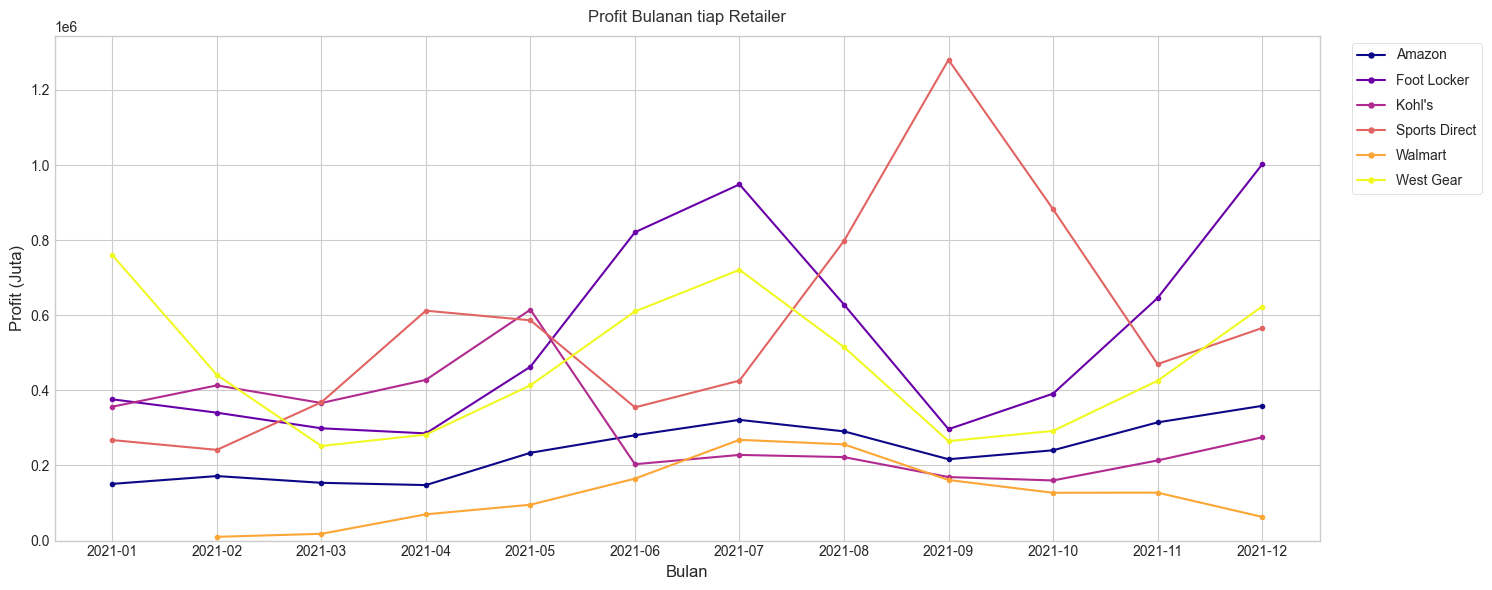

In [ ]:
# Operating Profit per Retailer
profit_retailer = (
    df_2021.groupby(['Order Month', 'Retailer'])['Operating Profit']
    .sum()
    .unstack()
)

# Plot
profit_retailer.plot(marker='.', figsize=(15,6), cmap='plasma')

plt.title('Profit Bulanan tiap Retailer', loc='center', pad=10,
          fontsize=12, color='#333333')
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Profit (Juta)', fontsize=12)
plt.ylim(ymin=0)

labels, locations = plt.yticks()


plt.xticks(
    ticks=range(len(monthly_profit.index)),
    labels=profit_retailer.index,
    rotation=0
)

plt.legend(
    loc='upper left', 
    bbox_to_anchor=(1.02, 1), 
    fontsize=10,
    markerscale=1.2,  
    frameon=True,   
    labelspacing=0.8  
)

plt.tight_layout()
plt.show()


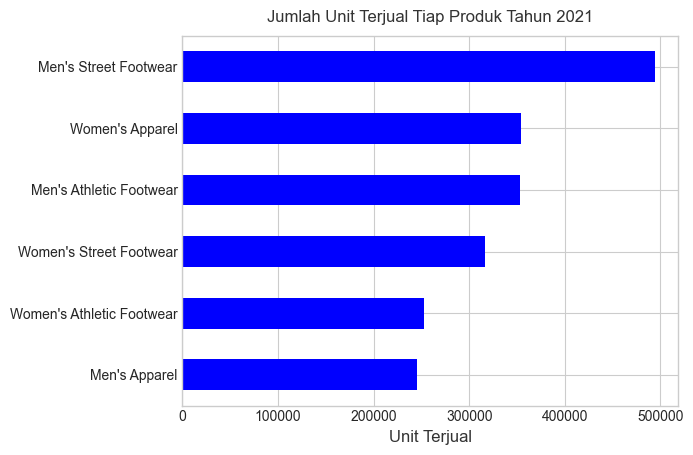

In [ ]:
# Jumlah Unit Terjual per Produk

df_2021.groupby('Product')['Units Sold'].sum().sort_values(ascending=True).plot(
    kind='barh', color='blue'
)
plt.title('Jumlah Unit Terjual Tiap Produk Tahun 2021', loc='center', pad=10, fontsize=12, color='#333333')
plt.xlabel('Unit Terjual', fontsize=12, color = '#333333') 
plt.ylabel('')
plt.xticks(rotation=0) 
labels, locations = plt.xticks()
plt.show()


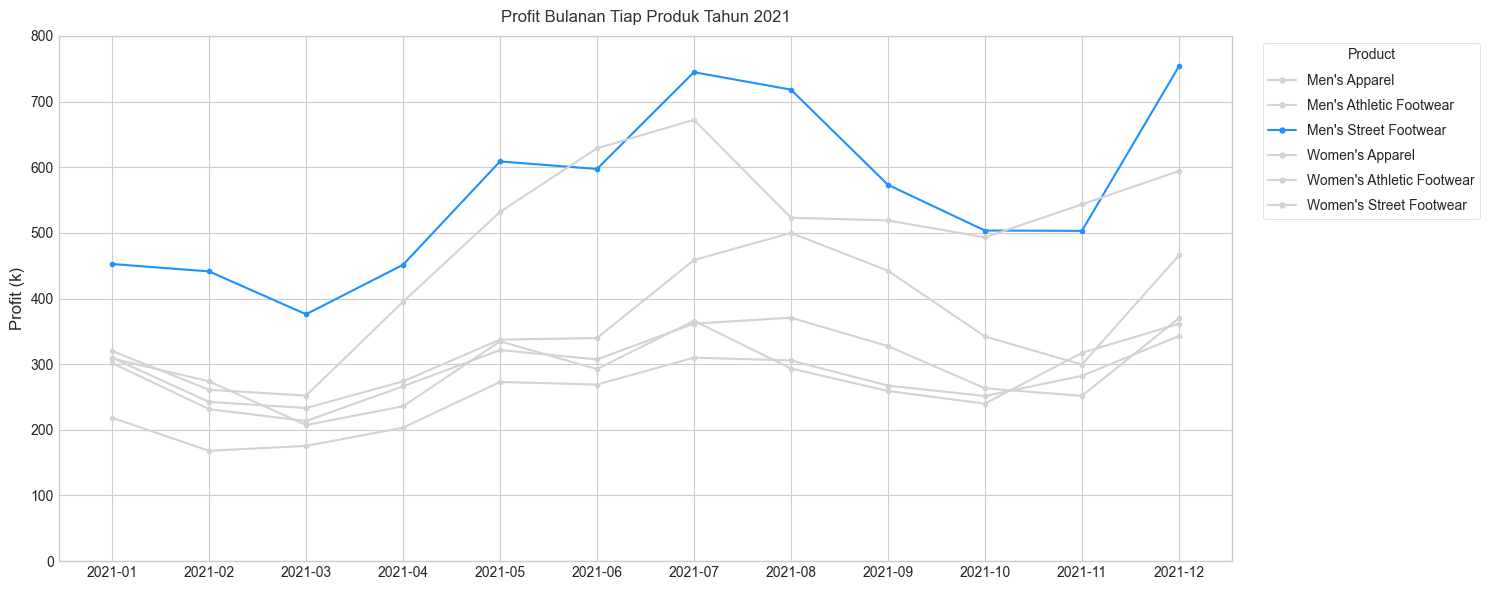

In [ ]:
# Monthly Profit per Produk
target_product = "Men's Street Footwear"
df_profit_summary = df_2021.groupby(['Order Month', 'Product'])['Operating Profit'].sum().reset_index()

colors = {
    name: 'dodgerblue' if name == target_product else 'lightgray'
    for name in df_profit_summary['Product'].unique()
}

plt.figure(figsize=(15,6))

for product_name in df_profit_summary['Product'].unique():
    data = df_profit_summary[df_profit_summary['Product'] == product_name]
    plt.plot(data['Order Month'], data['Operating Profit'],
             label=product_name, marker='.', color=colors[product_name])
    
plt.title('Profit Bulanan Tiap Produk Tahun 2021', loc='center', pad=10,
          fontsize=12, color='#333333')
plt.xlabel(None)
plt.ylabel('Profit (k)', fontsize=12)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels / 1000).astype(int))
plt.xticks(rotation=0)
plt.legend(
    title="Product",
    loc='upper left', 
    bbox_to_anchor=(1.02, 1), 
    fontsize=10,
    markerscale=1.2,  
    frameon=True,   
    labelspacing=0.8  
)

plt.tight_layout()
plt.show()

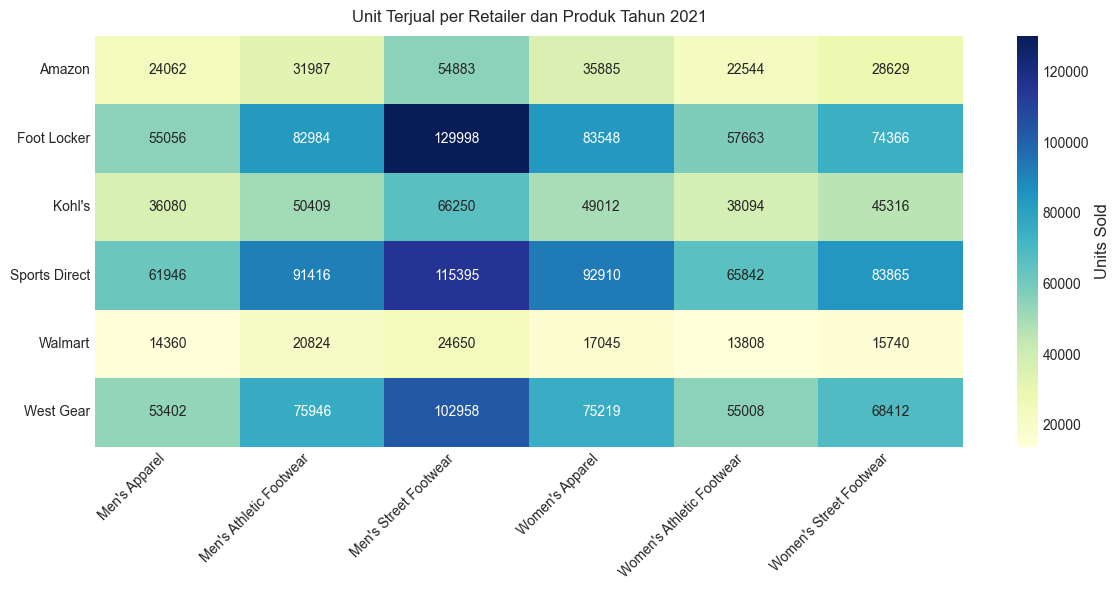

In [ ]:
# Total Unit Terjual per Retailer dan Produk
pivot = df_2021.pivot_table(
    index="Retailer",
    columns="Product",
    values="Units Sold",
    aggfunc="sum",
    fill_value=0
)

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot,
    annot=True,
    fmt = "",    
    cmap="YlGnBu",      
    cbar_kws={'label': 'Units Sold'}
)

plt.title("Unit Terjual per Retailer dan Produk Tahun 2021", fontsize=12, pad=10)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


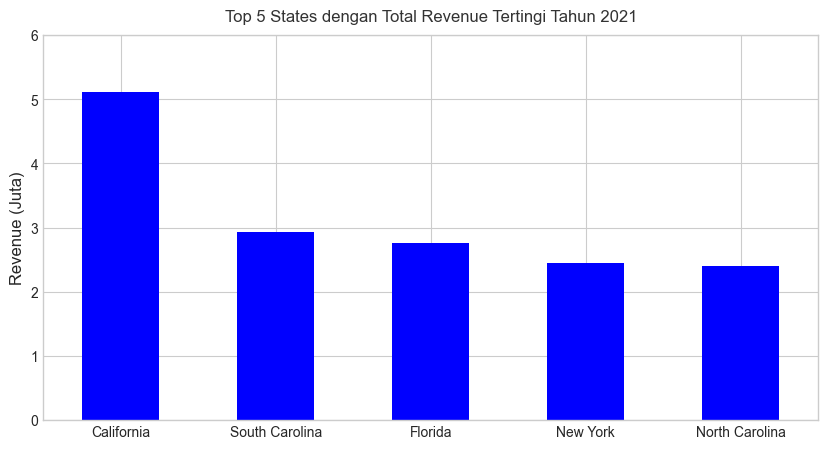

In [ ]:
# Total Revenue per State
Top_States = (
    df_2021.groupby('State')['Total Sales']
    .sum()
    .reset_index()
    .sort_values(by = 'Total Sales', ascending = False)
    .head(5)
    )
top_5_state = df_2021[df_2021['State'].isin(Top_States['State'])]



top_5_state.groupby(['State'])['Total Sales'].sum().sort_values(ascending=False).plot(kind = 'bar', color = 'blue', figsize=(10, 5))
plt.title('Top 5 States dengan Total Revenue Tertingi Tahun 2021', loc = 'center', pad = 10, fontsize = 12, color = '#333333')
plt.xlabel(None)
plt.ylabel('Revenue (Juta)', fontsize = 12)
plt.ylim(ymin = 10)
labels, locations = plt.yticks()
plt.yticks(labels, (labels / 1000000).astype(int))
plt.xticks(rotation=0)
plt.show()



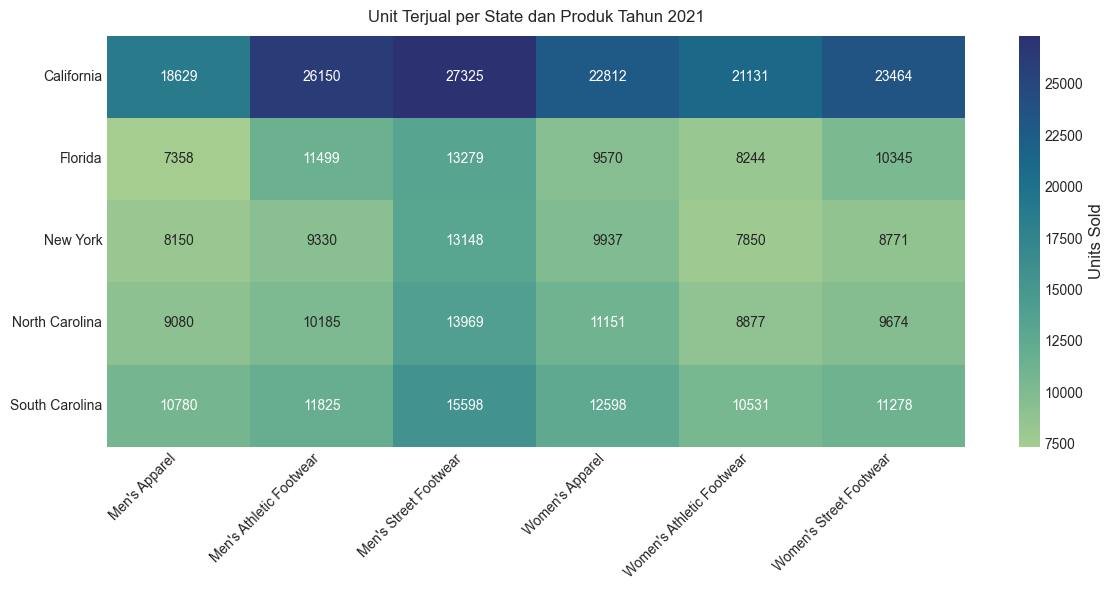

In [ ]:
# Total Unit Terjual per State dan Produk
pivot = top_5_state.pivot_table(
    index="State",
    columns="Product",
    values="Units Sold",
    aggfunc="sum",
    fill_value=0
)

# Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    pivot,
    annot=True,
    fmt = "",    
    cmap="crest",      
    cbar_kws={'label': 'Units Sold'}
)

plt.title("Unit Terjual per State dan Produk Tahun 2021", fontsize=12, pad=10)
plt.xlabel(None)
plt.ylabel(None)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

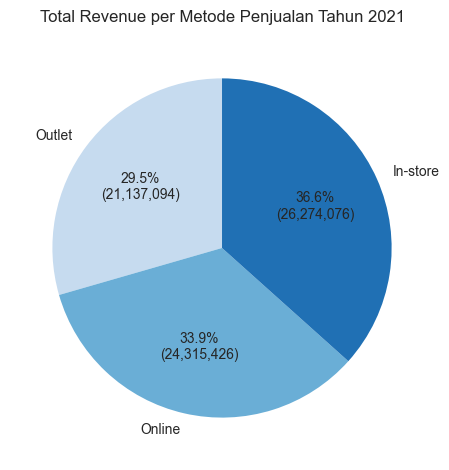

In [ ]:
# Total Revenue per Metode Penjualan
Metode_Penjualan = (
    df_2021.groupby('Sales Method')['Total Sales']
    .sum()
    .reset_index()
    .sort_values(by = 'Total Sales', ascending = True)
    )

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return f'{pct:.1f}%\n({val:,})' 
    return my_format

colors = sns.color_palette("Blues", len(Metode_Penjualan))
plt.pie(
    Metode_Penjualan['Total Sales'],
    labels=Metode_Penjualan['Sales Method'],
    autopct=autopct_format(Metode_Penjualan['Total Sales']),
    startangle=90,
    colors=colors
)
plt.title("Total Revenue per Metode Penjualan Tahun 2021", fontsize=12, pad=10)
plt.tight_layout()
plt.show()

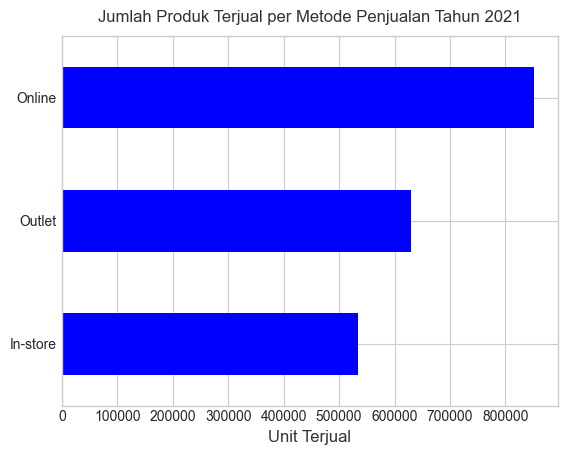

In [ ]:
# Total Unit Terjual per Metode Penjualan

df_2021.groupby('Sales Method')['Units Sold'].sum().sort_values(ascending=True).plot(
    kind='barh', color='blue'
)
plt.title('Jumlah Produk Terjual per Metode Penjualan Tahun 2021', loc='center', pad=10, fontsize=12, color='#333333')
plt.xlabel('Unit Terjual', fontsize=12, color = '#333333') 
plt.ylabel('')
plt.xticks(rotation=0) 
labels, locations = plt.xticks()
plt.show()


<Figure size 1200x500 with 0 Axes>

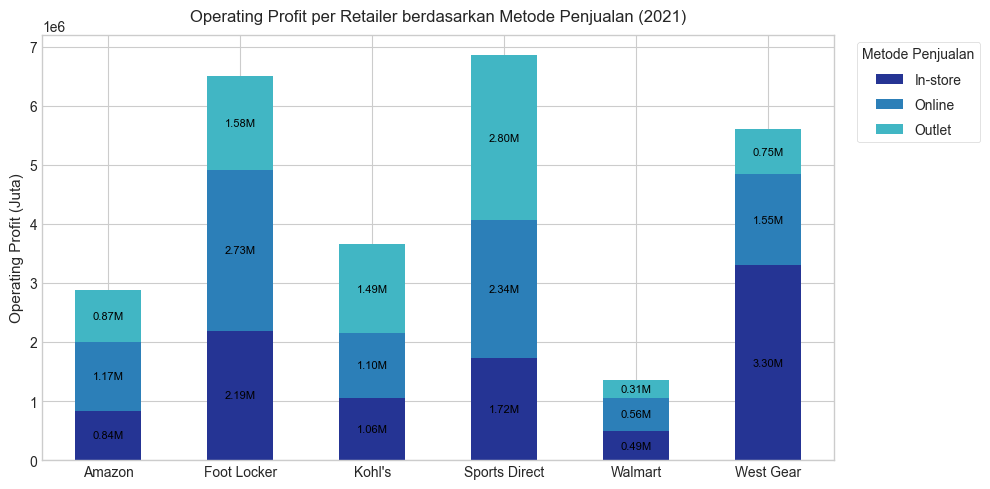

In [ ]:
# Total Operating Profit per Retailer dan Metode Penjualan
Retailer_Metode = (
    df_2021.groupby(['Retailer', 'Sales Method'])['Operating Profit']
    .sum()
    .unstack(fill_value=0)
)

plt.figure(figsize = (12, 5))

colors = colors = ["#253494", "#2c7fb8", "#41b6c4"]
ax = Retailer_Metode.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 5),
    color = colors  
)

for c in ax.containers:
    labels = [f'{v/1e6:.2f}M' if v > 0 else '' for v in c.datavalues]
    ax.bar_label(
        c, 
        labels=labels,
        label_type='center',
        fontsize=8, 
        color='black'
    )

plt.title("Operating Profit per Retailer berdasarkan Metode Penjualan (2021)", fontsize=12, pad=10)
plt.xlabel(None)
plt.ylabel("Operating Profit (Juta)", fontsize=11)
plt.xticks(rotation=0)
plt.legend(
    title="Metode Penjualan",
    loc='upper left', 
    bbox_to_anchor=(1.02, 1), 
    fontsize=10,
    markerscale=1.2,  
    frameon=True,   
    labelspacing=0.8  
)
plt.tight_layout()
plt.show()

